In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

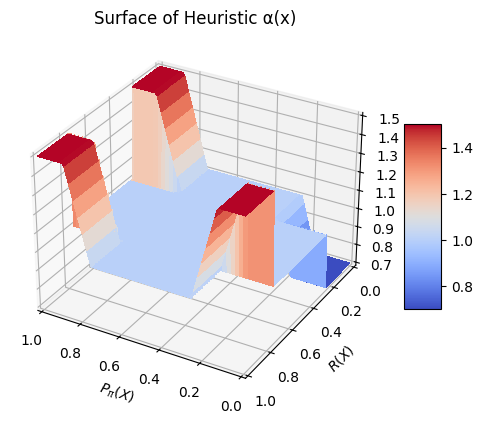

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def compute_heuristic_weights(P, R, k, ub, lb):
    """
    Compute the heuristic alpha(x) and beta(x) weights for a batch of samples.
    
    Args:
        P: The generation probabilities P_pi_theta(x) for the batch
        R: The reward scores R(x) for the batch
        k: The threshold of times of standard variance
        ub: The upper bound for alpha(x) and beta(x)
        lb: The lower bound for alpha(x) and beta(x)
        
    Returns:
        alpha: The heuristic alpha(x) weights for the batch
        beta: The heuristic beta(x) weights for the batch
    """
    mu_P, sigma_P = np.mean(P), np.std(P)
    mu_R, sigma_R = np.mean(R), np.std(R)
    
    alpha = np.ones_like(P)
    beta = np.ones_like(P)
    
    F_op = lambda mu, sigma: mu - k * sigma
    G_op = lambda mu, sigma: mu + k * sigma
    
    high_perf_mask = (P >= G_op(mu_P, sigma_P)) & (R >= G_op(mu_R, sigma_R))
    overfit_mask = (P >= G_op(mu_P, sigma_P)) & (R <= F_op(mu_P, sigma_P))
    high_var_mask = (P <= F_op(mu_P, sigma_P)) & (R >= G_op(mu_R, sigma_R))
    noisy_mask = (P <= F_op(mu_P, sigma_P)) & (R <= F_op(mu_P, sigma_P))
    
    alpha[high_perf_mask] = np.minimum(ub, (P[high_perf_mask] - mu_P) / (k * sigma_P))
    alpha[overfit_mask] = np.minimum(ub, (P[overfit_mask] - mu_P) / (k * sigma_P))
    alpha[high_var_mask] = np.minimum(ub, (1 - P[high_var_mask] - mu_P) / (k * sigma_P))
    alpha[noisy_mask] = np.maximum(lb, 2 + (P[noisy_mask] - mu_P) / (k * sigma_P))
    
    beta[high_perf_mask] = np.minimum(ub, (R[high_perf_mask] - mu_R) / (k * sigma_R))
    beta[overfit_mask] = np.maximum(lb, 2 + (R[overfit_mask] - mu_R) / (k * sigma_R))
    beta[high_var_mask] = np.maximum(lb, 2 + (1 - R[high_var_mask] - mu_R) / (k * sigma_R))
    beta[noisy_mask] = np.maximum(lb, 2 + (R[noisy_mask] - mu_R) / (k * sigma_R))
    
    return alpha, beta

k = 0.85  # Threshold of times of standard variance
ub = 1.5 # Upper bound of weights
lb = 0.7

# Create a meshgrid of P and R values
P, R = np.mgrid[0:1:100j, 0:1:100j]

# Compute alpha and beta values for each point on the grid
alpha, beta = compute_heuristic_weights(P, R, k, ub, lb)

# Plot the surfaces
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), projection="3d")

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

surf1 = ax1.plot_surface(P, R, alpha, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.set_title('Surface of Heuristic α(x)')
ax1.set_xlabel('$P_{\pi}(X)$')
ax1.set_ylabel('$R(X)$')
ax1.set_xlim(1, 0)
ax1.set_ylim(1, 0)

fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()


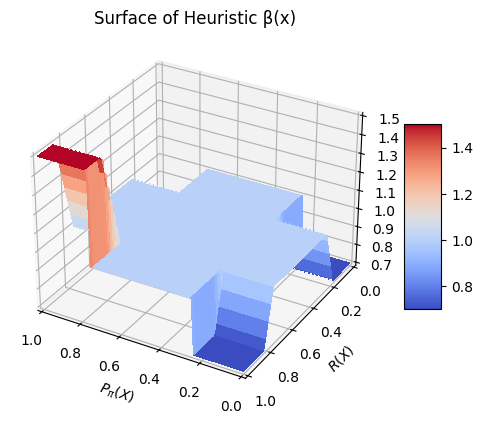

In [146]:

fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
surf2 = ax2.plot_surface(P, R, beta, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.set_title('Surface of Heuristic β(x)')
ax2.set_xlabel('$P_{\pi}(X)$')
ax2.set_ylabel('$R(X)$')
ax2.set_xlim(1, 0)
ax2.set_ylim(1, 0)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.show()